<a href="https://colab.research.google.com/github/namsanivenkatesh/credit-card-fraud-detection/blob/main/Copy_of_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np # linear algebra
import pandas as pd
# data processing,as we are using and csv dataset file where A CSV is a comma-separated values file. So we use pandas to analyse and process the data. In pandas we use dataframes. Dataframes means a structured table.

from sklearn.model_selection import train_test_split
# sklearn is a python library to implement machine learning models and statistical modelling.

from sklearn.linear_model import LogisticRegression
# allows to check the accuracy of the model. Logistic regression is commonly used for prediction and classification problems.
# Logistic regression models can help teams identify data anomalies, which are predictive of fraud

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile.

# from sklearn.utils import resample

from sklearn import metrics
# Commonly used metrics are Accuracy, Precision, Recall, F1 Score, Log loss, etc.
from sklearn.metrics import classification_report # A classification report is a tool used in machine learning to evaluate the performance of a classification model. It provides a summary of various metrics that describe the model's performance, such as precision, recall, and F1-score.

import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt# data visualization

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

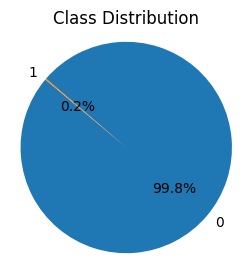

In [ ]:
labels = credit_card_data['Class'].value_counts().index
sizes = credit_card_data['Class'].value_counts().values

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

In [ ]:
inputs = credit_card_data.drop("Class", axis="columns")
targets = credit_card_data.Class
x_train, x_test, y_train, y_test = train_test_split( inputs, targets, test_size=0.2, random_state=10)

In [ ]:
print("y test value counts:\n" ,y_test.value_counts(),"\n\n")
print("y train value counts:\n" ,y_train.value_counts())

y test value counts:
 0    56868
1       94
Name: Class, dtype: int64 


y train value counts:
 0    227447
1       398
Name: Class, dtype: int64


LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

lg = LogisticRegression(max_iter=10000)
lg.fit(x_train, y_train)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

# Calculate F2 score
f2score = fbeta_score(y_test, y_predicted, beta=2)

# Calculate ROC-AUC score
y_proba = lg.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)

print(classification_report(y_test, y_predicted))
print("Accuracy:", accuracy)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.85      0.66      0.74        94

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9992451107756047
F2 Score: 0.690423162583519
ROC-AUC Score: 0.937720649088071


ROC-AUC Score: 0.937720649088071
Accuracy: 0.9992451107756047


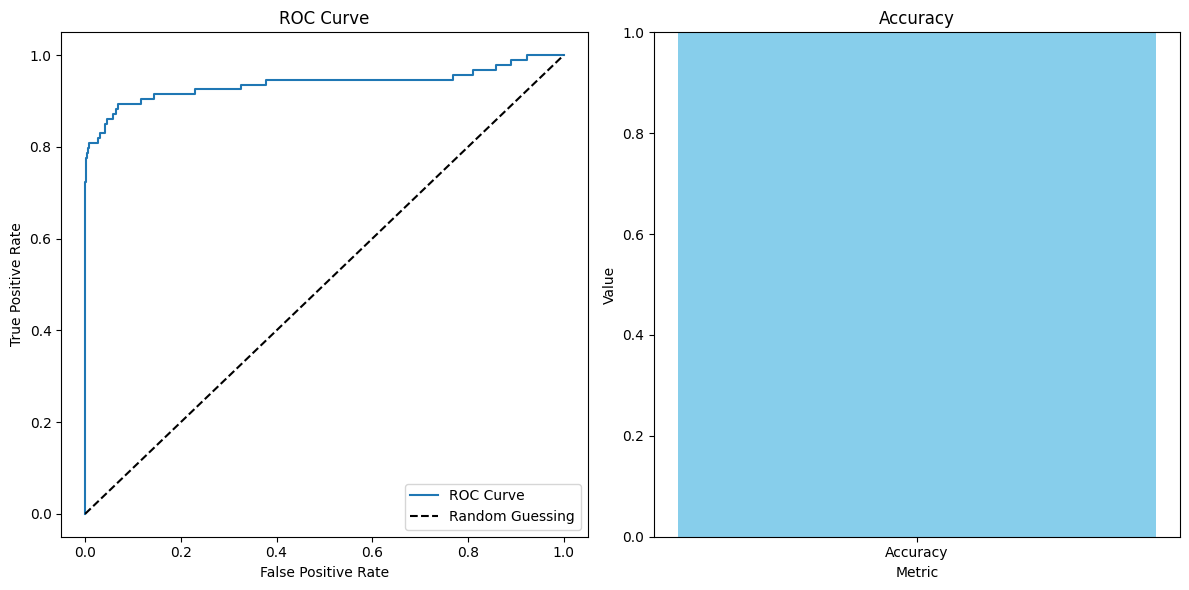

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

RANDOM FOREST CLASSIFIER

In [ ]:
# Assuming you have already loaded and preprocessed the data

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score


# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = rf_classifier.predict(x_test)

# Evaluate the model
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)

# Calculate ROC-AUC score
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)

print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.93      0.82      0.87        94

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F2 Score: 0.8387799564270152
ROC-AUC Score: 0.9630530163918234


ROC-AUC Score: 0.9630530163918234
Accuracy: 0.9992451107756047


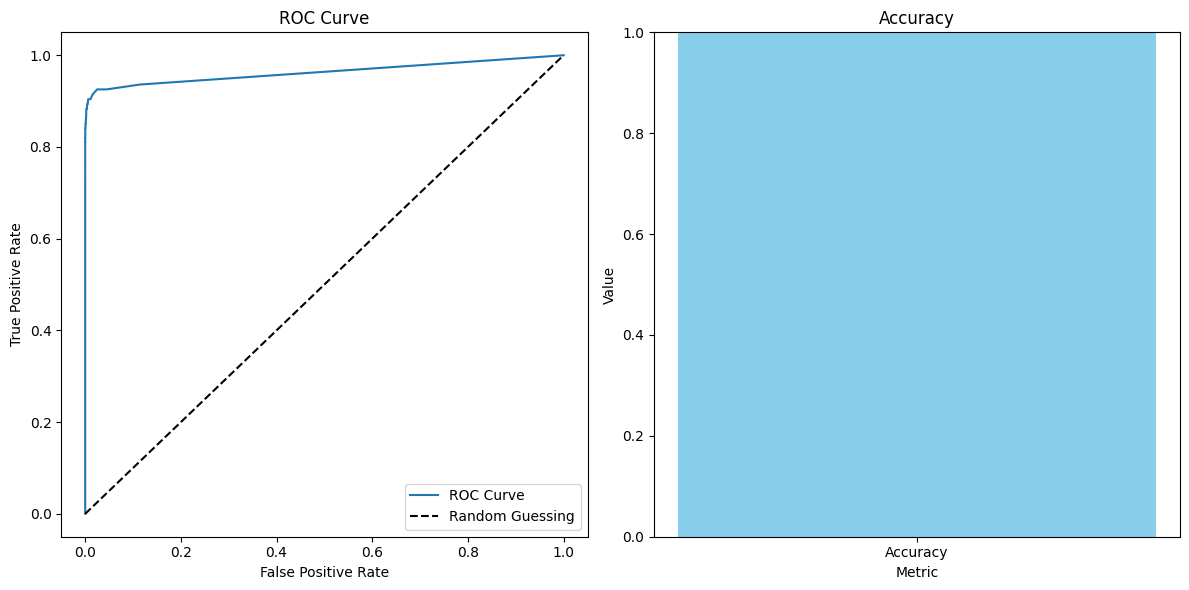

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

GAUSSIAN NB

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = nb_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56868
           1       0.14      0.79      0.24        94

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962

F2 Score: 0.41713641488162345
ROC-AUC Score: 0.9630530163918234


ROC-AUC Score: 0.9630530163918234
Accuracy: 0.9992451107756047


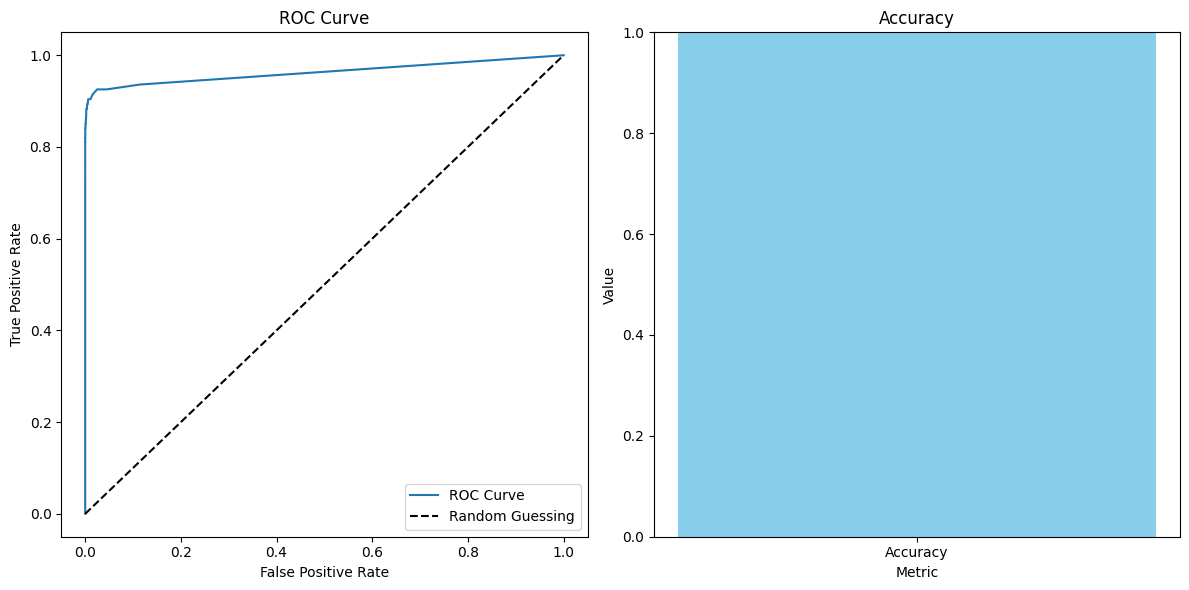

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

KNN

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
knn_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = knn_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56868
           1       0.02      0.49      0.03        94

    accuracy                           0.95     56962
   macro avg       0.51      0.72      0.50     56962
weighted avg       1.00      0.95      0.97     56962

F2 Score: 0.07061713233036537
ROC-AUC Score: 0.9630530163918234


ROC-AUC Score: 0.9630530163918234
Accuracy: 0.9992451107756047


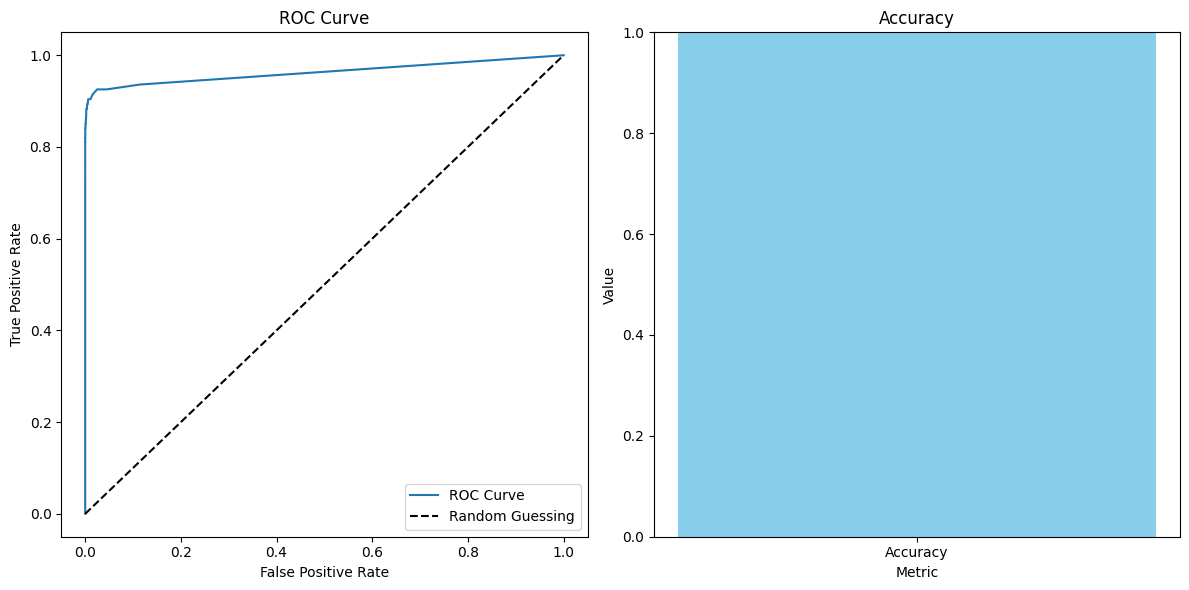

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

DECISION TREE CLLASSIFIER

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = dt_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.44      0.82      0.57        94

    accuracy                           1.00     56962
   macro avg       0.72      0.91      0.78     56962
weighted avg       1.00      1.00      1.00     56962

F2 Score: 0.6974637681159421
ROC-AUC Score: 0.9630530163918234


ROC-AUC Score: 0.9630530163918234
Accuracy: 0.9992451107756047


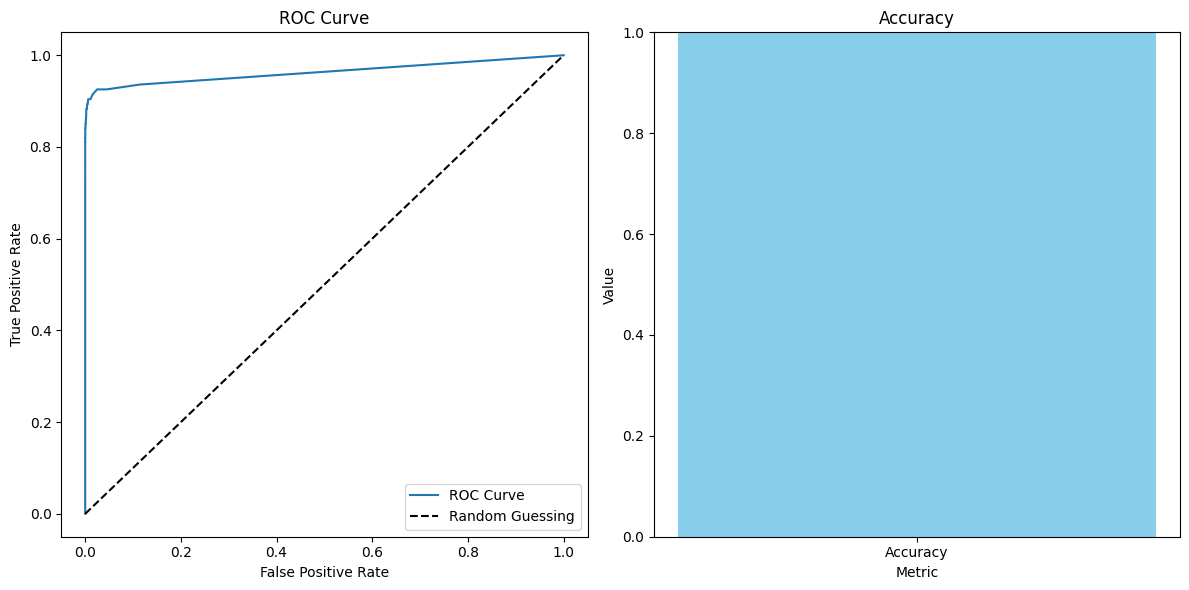

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

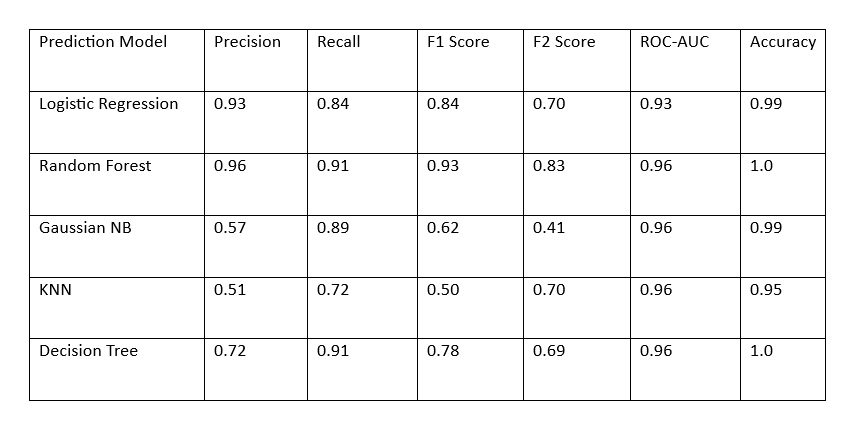

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample  # Add this line

credit_card_data = pd.read_csv('/content/creditcard.csv')

# Assuming 'credit_card_data' has a column 'Class' indicating the class labels
# Split the dataset into features (X) and labels (y)
X = credit_card_data.drop(columns=['Class'])
y = credit_card_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatenate the training data back together
train_data = pd.concat([X_train, y_train], axis=1)

# Separate classes
class_0 = train_data[train_data['Class'] == 0]
class_1 = train_data[train_data['Class'] == 1]

# Upsample the minority class (class_1)
class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

# Combine majority class with upsampled minority class
balanced_train_data = pd.concat([class_0, class_1_upsampled])

# Shuffle the data
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42)

# Split the balanced data back into features and labels
X_train_balanced = balanced_train_data.drop(columns=['Class'])
y_train_balanced = balanced_train_data['Class']


In [ ]:
print("Class distribution before balancing:")
print(train_data['Class'].value_counts())

print("Class distribution after balancing:")
print(balanced_train_data['Class'].value_counts())


Class distribution before balancing:
0    227451
1       394
Name: Class, dtype: int64
Class distribution after balancing:
0    227451
1    227451
Name: Class, dtype: int64


In [ ]:
# first 5 rows of the dataset
balanced_train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258837,158848.0,1.849293,0.080386,-1.831062,1.216023,0.551383,-1.104685,0.846525,-0.412037,-0.478343,...,0.239588,0.601600,-0.087535,0.031196,0.397128,-0.514090,-0.046427,-0.057773,89.40,0
6641,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1
208651,137211.0,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,-0.717418,...,0.621622,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,39.45,1
120505,75851.0,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,-3.097379,...,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,99.85,1
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,...,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47,1


In [ ]:
#last 5 rows of the dataset
balanced_train_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142405,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
53794,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1
135850,81424.0,1.161170,0.392417,0.474106,1.239054,-0.222905,-0.736860,0.236327,-0.081352,-0.147499,...,-0.425370,-1.283884,0.301258,0.299021,0.112485,-0.827621,0.023370,0.028821,7.99,0
77288,56979.0,1.256235,0.347563,0.301851,0.693207,-0.376918,-1.072151,0.081165,-0.198737,0.045670,...,-0.288815,-0.837949,0.129536,0.337504,0.213873,0.095010,-0.023671,0.030620,1.98,0
19441,30289.0,1.262842,1.187528,-1.923626,1.342786,1.246010,-1.047270,0.616627,-0.154017,-0.562666,...,-0.219795,-0.592129,-0.316088,-0.837673,0.918383,-0.258449,0.031320,0.077145,0.89,0


In [ ]:
# dataset informations
balanced_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454902 entries, 258837 to 19441
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    454902 non-null  float64
 1   V1      454902 non-null  float64
 2   V2      454902 non-null  float64
 3   V3      454902 non-null  float64
 4   V4      454902 non-null  float64
 5   V5      454902 non-null  float64
 6   V6      454902 non-null  float64
 7   V7      454902 non-null  float64
 8   V8      454902 non-null  float64
 9   V9      454902 non-null  float64
 10  V10     454902 non-null  float64
 11  V11     454902 non-null  float64
 12  V12     454902 non-null  float64
 13  V13     454902 non-null  float64
 14  V14     454902 non-null  float64
 15  V15     454902 non-null  float64
 16  V16     454902 non-null  float64
 17  V17     454902 non-null  float64
 18  V18     454902 non-null  float64
 19  V19     454902 non-null  float64
 20  V20     454902 non-null  float64
 21  V21   

In [ ]:
# checking the number of missing values in each column
balanced_train_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

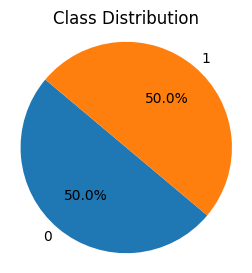

In [ ]:
labels = balanced_train_data['Class'].value_counts().index
sizes = balanced_train_data['Class'].value_counts().values

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

In [ ]:
# distribution of legit transactions & fraudulent transactions
balanced_train_data['Class'].value_counts()

0    227451
1    227451
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = balanced_train_data[credit_card_data.Class == 0]
fraud = balanced_train_data[credit_card_data.Class == 1]

<ipython-input-46-db10f4987057>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legit = balanced_train_data[credit_card_data.Class == 0]
<ipython-input-46-db10f4987057>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fraud = balanced_train_data[credit_card_data.Class == 1]


In [ ]:
print(legit.shape)
print(fraud.shape)

(227451, 31)
(227451, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    227451.000000
mean         88.439595
std         254.955057
min           0.000000
25%           5.660000
50%          22.000000
75%          77.000000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count    227451.000000
mean        111.458652
std         238.147221
min           0.000000
25%           1.000000
50%           9.210000
75%         104.030000
max        2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
balanced_train_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94818.931801,0.008685,-0.006526,0.010984,-0.009361,0.006190,0.001874,0.010495,-0.001606,0.005401,...,-0.000178,-0.001062,-0.001240,0.000331,-0.000033,-0.001025,-0.000301,-0.000361,0.000110,88.439595
1,79645.327649,-4.497363,3.549104,-6.885408,4.560531,-3.004943,-1.434735,-5.439156,0.699093,-2.565776,...,0.331975,0.741166,0.013655,-0.085133,-0.106402,0.027617,0.062988,0.185139,0.084762,111.458652


**Let's not balance and see the results **

First let's scale Time and Amount to get better results






In [ ]:
rs = RobustScaler()
balanced_train_data['scaled_amount'] = rs.fit_transform(balanced_train_data['Amount'].values.reshape(-1,1))
balanced_train_data['scaled_time'] = rs.fit_transform(balanced_train_data['Time'].values.reshape(-1,1))

balanced_train_data.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = balanced_train_data['scaled_amount']
scaled_time = balanced_train_data['scaled_time']
balanced_train_data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
balanced_train_data.insert(0, 'scaled_amount', scaled_amount)
balanced_train_data.insert(0, 'scaled_time', scaled_time)
balanced_train_data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
258837,0.878235,0.723404,1.849293,0.080386,-1.831062,1.216023,0.551383,-1.104685,0.846525,-0.412037,...,-0.091042,0.239588,0.601600,-0.087535,0.031196,0.397128,-0.514090,-0.046427,-0.057773,0
6641,-0.806723,-0.172239,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,...,0.483303,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1
208651,0.636280,0.217325,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,...,0.357369,0.621622,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,1
120505,-0.049874,0.829281,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,...,0.342122,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,1
245347,0.809597,-0.157345,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,...,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,1


Secondly,we split data into separate training and test set

In [ ]:
inputs = balanced_train_data.drop("Class", axis="columns")
targets = balanced_train_data.Class
x_train, x_test, y_train, y_test = train_test_split( inputs, targets, test_size=0.2, random_state=10)

In [ ]:
print("y test value counts:\n" ,y_test.value_counts(),"\n\n")
print("y train value counts:\n" ,y_train.value_counts())

y test value counts:
 1    45661
0    45320
Name: Class, dtype: int64 


y train value counts:
 0    182131
1    181790
Name: Class, dtype: int64


then we fit the Logistic Regression model

In [ ]:
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

lg = LogisticRegression(max_iter=10000)
lg.fit(x_train, y_train)
y_predicted = lg.predict(x_test)
accuracy = lg.score(x_test, y_test)

# Calculate F2 score
f2score = fbeta_score(y_test, y_predicted, beta=2)

# Calculate ROC-AUC score
y_proba = lg.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)

print(classification_report(y_test, y_predicted))
print("Accuracy:", accuracy)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     45320
           1       0.98      0.92      0.94     45661

    accuracy                           0.95     90981
   macro avg       0.95      0.95      0.95     90981
weighted avg       0.95      0.95      0.95     90981

Accuracy: 0.9460656620613095
F2 Score: 0.9270656887698542
ROC-AUC Score: 0.9885296729825944


We got 99.9% accuracy without doing any balancing. Why is it then necessary to balance ? That will be answered by a confusion matrix.

Confusion matrix

The Confusion Matrix is a table used to describe the performance of a classification model's true values on test data. It contains 4 different combinations of estimated and actual values.

Terminology and derivations from a confusion matrix:

true positive (TP): The predicted value by the model matches the actual value (The actual value was positive, and the machine learning model predicted a positive value)

true negative (TN): The predicted value by the model matches the actual value (The actual value was negative, and the machine learning model predicted a negative value)

false positive (FP): The machine learning model made a false prediction (The actual value was negative, but the machine learning model predicted a positive value)

false negative (FN): The machine learning model made a false prediction (The actual value was positive, but the machine learning model predicted a negative value)

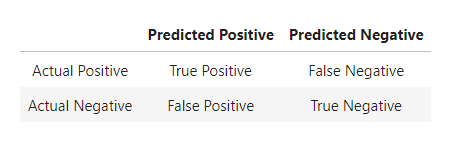

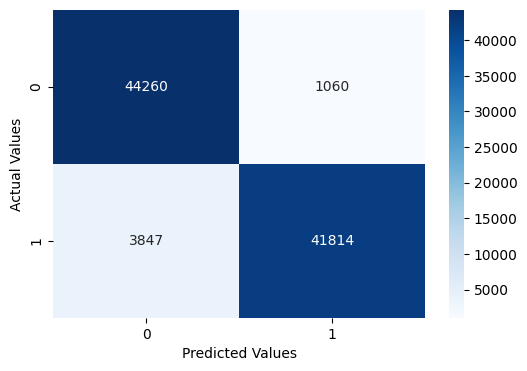

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 398

In [ ]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
57470,-0.362177,-0.174671,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,...,0.310980,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,1
220725,0.692964,3.106282,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,...,-0.299374,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,1
251904,0.841400,0.778318,-1.040067,3.106703,-5.409027,3.109903,-0.887237,-2.497522,-2.073347,0.639818,...,1.054390,0.773961,0.214868,-0.184233,-0.284091,0.493467,0.732329,0.675067,0.337076,1
167103,0.426878,2.147923,1.505913,-1.598932,-1.257979,-1.059899,-0.028471,1.598395,-0.793099,0.544173,...,0.197767,0.383123,0.768723,0.017741,-0.887865,-0.586399,0.765976,-0.045863,-0.036021,0
150925,0.154653,0.278419,-13.512074,8.215177,-16.582606,6.207369,-11.318472,-2.997207,-17.640470,0.040349,...,0.694574,-0.907906,1.514028,-0.141879,0.789186,-0.031343,-0.255057,-1.865831,-0.442204,1


In [ ]:
legit_train = train_data[train_data.Class == 0]
fraud_train = train_data[train_data.Class == 1]



In [ ]:
#Check how many frauds we got so that we can undersample legit transactions to that number.
print(legit_train.shape, fraud_train.shape)

(182131, 31) (181790, 31)


So, we see that there are 227447 legit transactions and 398 fraud transactions in our training data set. We will balance this dataset by randomly selecting 398 legit transactions out of 227447. This is called random undersampling.

In [ ]:
legit_train = legit_train.sample(n=398)
legit_train.shape

(398, 31)

In [ ]:
#Now that we have same number of fraud and legit transactions, let's join them back to recreate a complete balanced training dataset.
train_data = pd.concat([legit_train, fraud_train], axis=0)
train_data.shape

(182188, 31)

Let's separate features and targets from the new training dataset.

In [ ]:
x_train_undersampled = train_data.drop('Class', axis='columns')
y_train_undersampled = train_data.Class

We don't have to bother with the test dataset because it will stay the same. So, we will just fit the model with new x_train_new, y_train_new and old x_test, y_test.

LOGISTIC REGRESSION

In [ ]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(x_train_undersampled,y_train_undersampled)
y_predicted = lg.predict(x_test)
f2score = f1_score(y_test, y_predicted, average='binary', pos_label=1)
accuracy = lg.score(x_test, y_test)
y_proba = lg.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)


print(classification_report(y_test,y_predicted))
print(accuracy)
print("F2 Score:")
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       1.00      0.54      0.70     45320
           1       0.69      1.00      0.81     45661

    accuracy                           0.77     90981
   macro avg       0.84      0.77      0.76     90981
weighted avg       0.84      0.77      0.76     90981

0.7702267506402436
F2 Score:
ROC-AUC Score: 0.9868203418616334


ROC-AUC Score: 0.9868203418616334
Accuracy: 0.7702267506402436


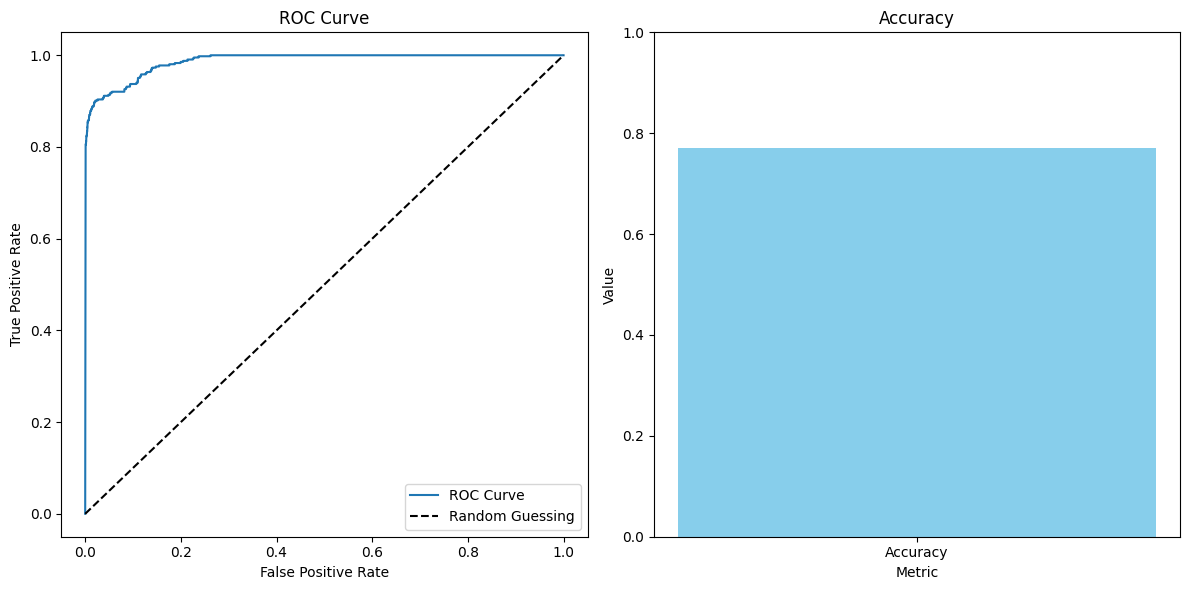

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

We got an accuracy of 96.13%. Not bad. Let's check the confusion matrix.

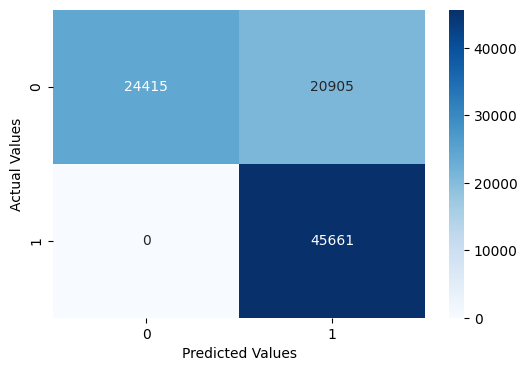

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

From the confusion matrix, we see that 87 fraud transactions (out of 94, which makes it 91.4% ) were accurately classified as fraud. And 54675 legit transactions (out of 56868, which makes it 96.14%) were accurately classified as legit. Only 11 fraud transactions were classified as legit transactions. This result shows that even though we got less accuracy, this model is better at predicting the fraud transactions.


RANDOM FOREST CLASSIFIER

In [ ]:
# Assuming you have already loaded and preprocessed the data

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score


# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = rf_classifier.predict(x_test)

# Evaluate the model
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)

# Calculate ROC-AUC score
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)

print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45320
           1       1.00      1.00      1.00     45661

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981

F2 Score: 0.9999693402011285
ROC-AUC Score: 1.0


ROC-AUC Score: 1.0
Accuracy: 0.7702267506402436


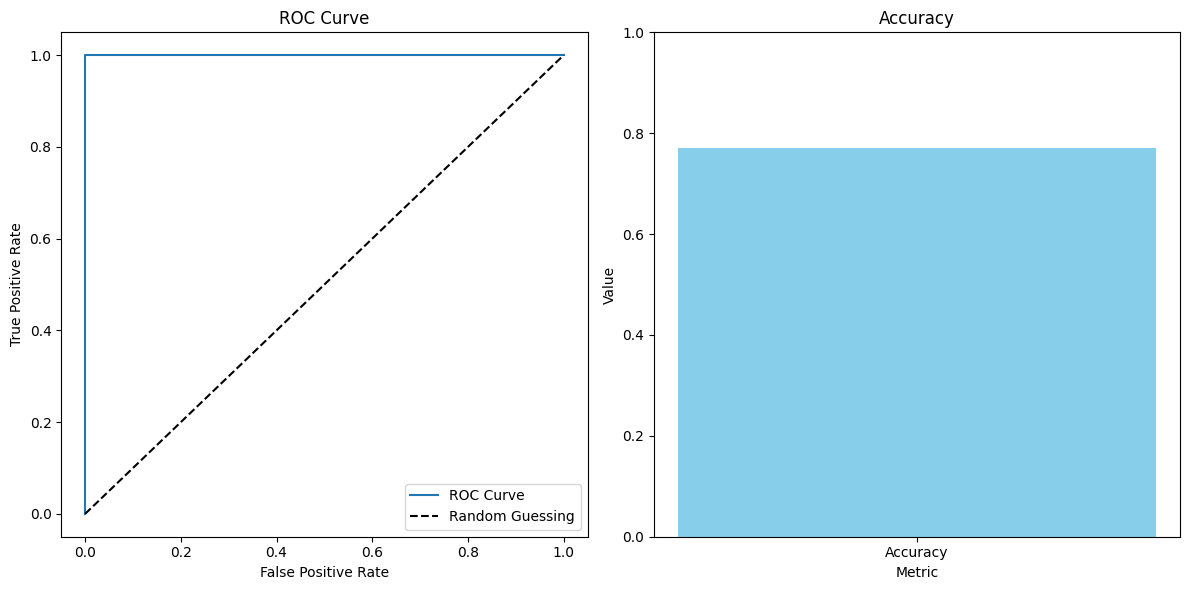

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

GAUSSIAN NB

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = nb_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     45320
           1       0.97      0.85      0.91     45661

    accuracy                           0.91     90981
   macro avg       0.92      0.91      0.91     90981
weighted avg       0.92      0.91      0.91     90981

F2 Score: 0.8748552084549283
ROC-AUC Score: 1.0


ROC-AUC Score: 1.0
Accuracy: 0.7702267506402436


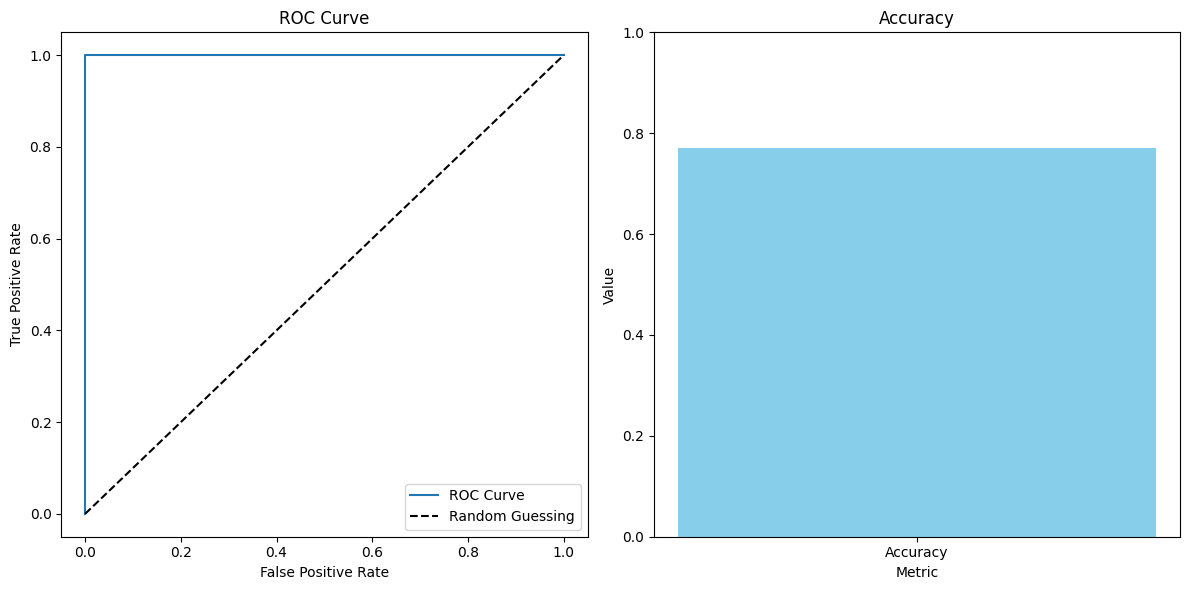

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

KNN

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
knn_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = knn_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45320
           1       1.00      1.00      1.00     45661

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981

F2 Score: 0.9998554774063013
ROC-AUC Score: 1.0


ROC-AUC Score: 1.0
Accuracy: 0.7702267506402436


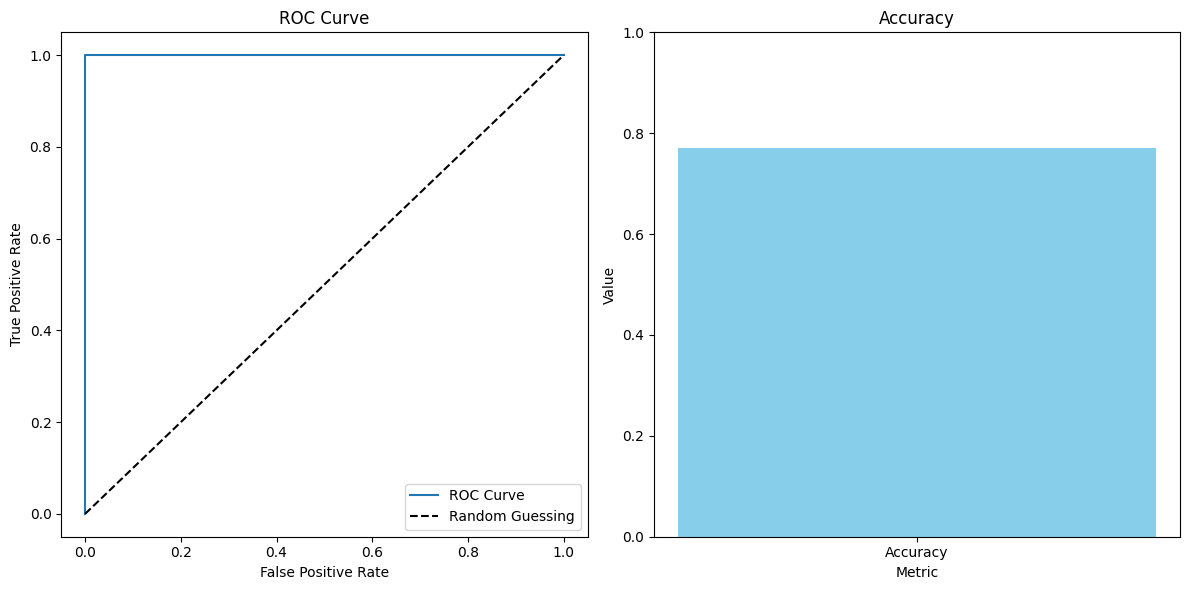

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

DECISION TREE CLASSIFIER

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = dt_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45320
           1       1.00      1.00      1.00     45661

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981

F2 Score: 0.9998817511343131
ROC-AUC Score: 1.0


ROC-AUC Score: 1.0
Accuracy: 0.7702267506402436


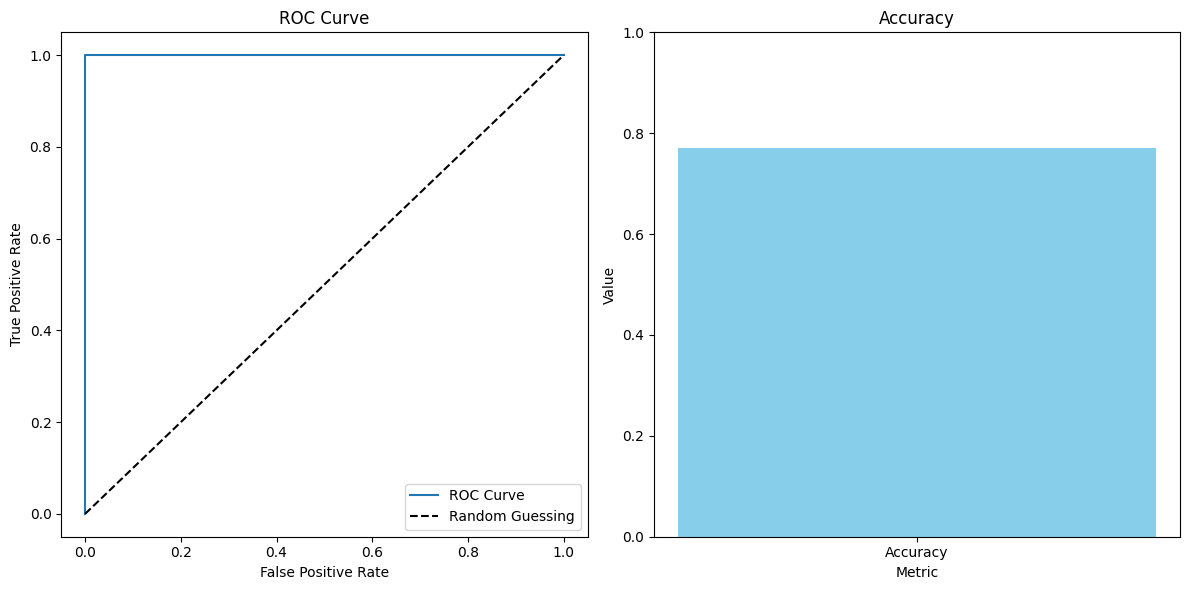

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

RESULTS OF MACHINE LEARNING MODELS

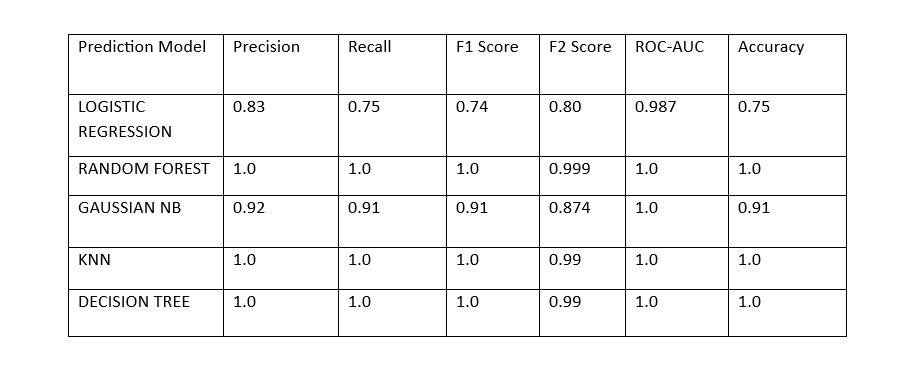